<a href="https://colab.research.google.com/github/wbssdi01/GEE/blob/main/KP_End2End_ML_Lulc_using_rf_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Rasterio (library, pronounced as Raster-io)

In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 359 kB/s 


# Import libraries: rasterio; seaborn and matplotlib (for visualisation) and numpy (for numerical operations)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import rasterio
from rasterio import plot
import pandas as pd

# Input raster: Satellite image and Counting the number of bands in the image

In [ ]:
# Input raster
mss=rasterio.open('/content/drive/MyDrive/GEE/Purulia_2020.tif')

In [ ]:
# Counting the number of bands in the image
mss.count

5

# Separating and storing the metadata of the image 

In [ ]:
# Getting the meta data from the image
georef = mss.meta
print(georef)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3272, 'height': 2920, 'count': 5, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 86.53066890045497,
       0.0, -8.983152841195215e-05, 23.490405690555015)}


In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(mss)

# Read 

In [ ]:
#blue=mss.read(1)
green = mss.read(3)
red = mss.read(4)
#rededge = mss.read(5)
nir =mss.read(5)
#swir1 =mss.read(7)
print(nir)

[[0.1866  0.1805  0.1837  ... 0.1987  0.1945  0.2034 ]
 [0.1849  0.184   0.1731  ... 0.1886  0.1863  0.1867 ]
 [0.1687  0.1745  0.1784  ... 0.1963  0.189   0.184  ]
 ...
 [0.2071  0.20785 0.20405 ... 0.1871  0.182   0.1686 ]
 [0.208   0.2081  0.2062  ... 0.1855  0.1799  0.1728 ]
 [0.20405 0.20395 0.2043  ... 0.1813  0.1727  0.1671 ]]


# Band stacking to create a False Color Composite

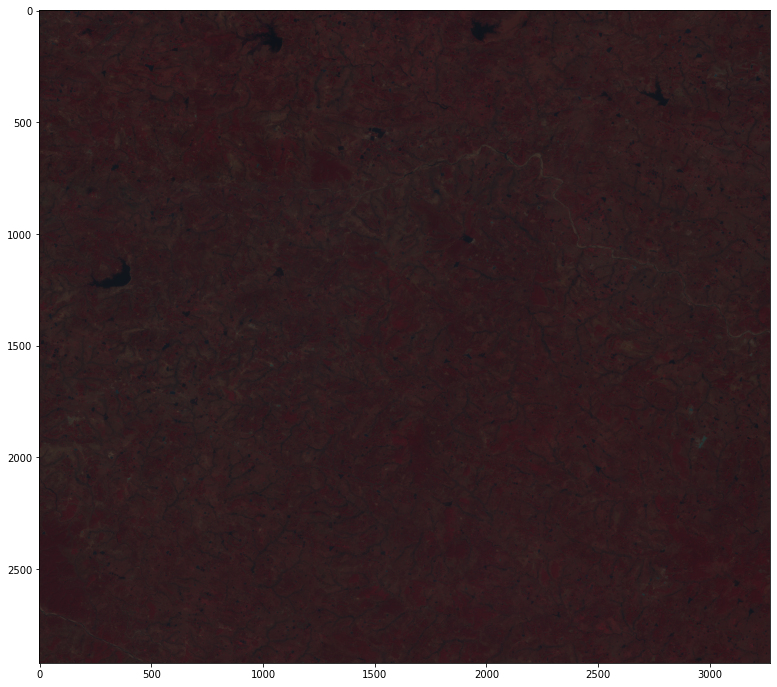

In [ ]:
nrg = np.dstack((nir, red, green))
# Let's see how our color composite looks like
fig = plt.figure(figsize=(18,12))
plt.imshow(nrg)

# Creating image histogram

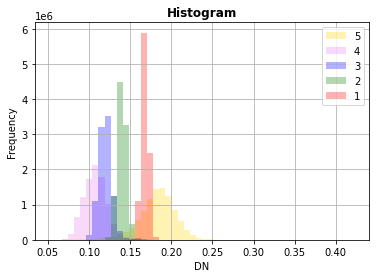

In [ ]:
# Histogram
from rasterio.plot import show_hist
show_hist(mss, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

# Dimension of the image scene

In [ ]:
# dimension (shape) of the bands
print(green.shape)
print(red.shape)
print(nir.shape)

(2920, 3272)
(2920, 3272)
(2920, 3272)


# Flattening of Image into an one dimensional array

In [ ]:
# title Default title text
green1=green.flatten()
red1=red.flatten()
#rededge1=rededge.flatten()
nir1=nir.flatten()
# swir11=swir1.flatten()
#blue1=blue.flatten()

In [ ]:
print(green1.shape)

(9554240,)


# NDVI Calculation

Here 'where'is equivalent to 'if-then-else'statement. This is added in order to avoid error in calculation

In [ ]:
ndvi=np.where((nir+red)==0.0, 0,(nir-red)/(nir+red))

Printing the ndvi layer

In [ ]:
ndvi

array([[0.15828678, 0.2077618 , 0.16634919, ..., 0.3163299 , 0.31108862,
        0.34036243],
       [0.13192531, 0.18709677, 0.17475396, ..., 0.22467533, 0.23705177,
        0.291148  ],
       [0.09403373, 0.16217117, 0.2320442 , ..., 0.26278546, 0.26252505,
        0.2944073 ],
       ...,
       [0.3948476 , 0.3926298 , 0.38597384, ..., 0.22930354, 0.21454786,
        0.19786856],
       [0.3908392 , 0.39383793, 0.38901988, ..., 0.22361475, 0.2106326 ,
        0.217759  ],
       [0.3876233 , 0.38341534, 0.3881434 , ..., 0.24093087, 0.22874422,
        0.20824294]], dtype=float32)

# NDMI calculation

In [ ]:
#ndmi=np.where((nir+swir1)==0.0, 0,(nir-swir1)/(nir+swir1))

In [ ]:
#ndmi

# SAVI calculation

In [ ]:
savi=np.where((nir+red+0.5)==0.0, 0, (nir-red)/(nir+red+0.5))*1.5

# Flattening of the ndvi layer for further processing



In [ ]:
#title Default title text
ndvi1=ndvi.flatten()
#ndmi1=ndmi.flatten()
savi1=savi.flatten()

Check the shape of the Flattened ndvi layer

In [ ]:
# title Default title text
print(ndvi1.shape)
#print(ndmi1.shape)
print(savi1.shape)

(9554240,)
(9554240,)


Visualisation of the ndvi layer using imshow and cmap command 


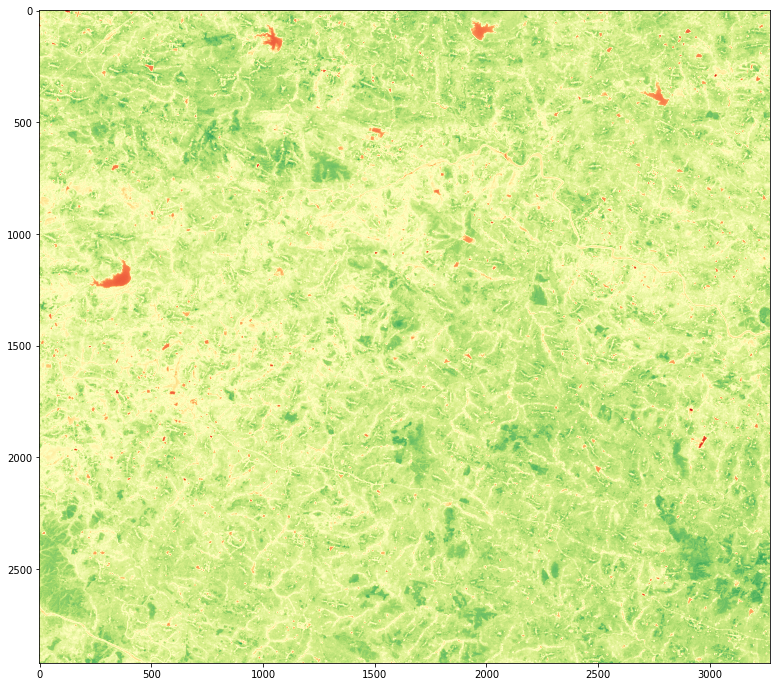

In [ ]:
fig = plt.figure(figsize=(18,12))
plt.imshow(ndvi, cmap='RdYlGn') # imshow - show image, cmap - visualisation parameter (red, yellow, green)

In [ ]:
#fig = plt.figure(figsize=(18,12))
#plt.imshow(ndmi, cmap='YlGn') # imshow - show image, cmap - visualisation parameter (blue, yellow, green)

# List of all bands of the image along with ndvi band

In [ ]:
#title List of all bands
#blue_list=blue1.tolist()
green_list=green1.tolist()
red_list=red1.tolist()
#rededge_list=rededge1.tolist()
nir_list=nir1.tolist()
#swir_list=swir11.tolist()
ndvi_list=ndvi1.tolist()
#ndmi_list=ndmi1.tolist()
savi_list=savi1.tolist()
#dem_list=dem.tolist()

print any list to check the data

In [ ]:
ndvi_list

# Read the label layer. In this example the label is the lulc raster. 

In [ ]:
# Label layer
lulc=rasterio.open("/content/drive/MyDrive/GEE/lulc_med.tif")
lulc=lulc.read(1)

Display the shape of the lulc raster

In [ ]:
lulc.shape

(2920, 3272)

#Flatten the lulc raster 

In [ ]:
#title Flatten lulc
lulc_1=lulc.flatten()
lulc_1.shape

(9554240,)

Plot the lulc layer in the notebook

In [ ]:
lulc

array([[60., 60., 40., ..., 40., 40., 40.],
       [60., 60., 40., ..., 40., 40., 40.],
       [60., 60., 40., ..., 40., 40., 40.],
       ...,
       [10., 10., 10., ..., 40., 40., 40.],
       [10., 10., 10., ..., 40., 40., 40.],
       [10., 10., 10., ..., 40., 40., 40.]])

In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc)

# Create a function named discrete_matshow to be used for visualisation of lulc

In [ ]:
# title 
def discrete_matshow2(data):
    #get discrete colormap
    cmap = plt.get_cmap('RdYlGn', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(18,12)) ## increase fig size
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, fignum=1) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5) ## added shrink

Visualise the lulc using the function created 

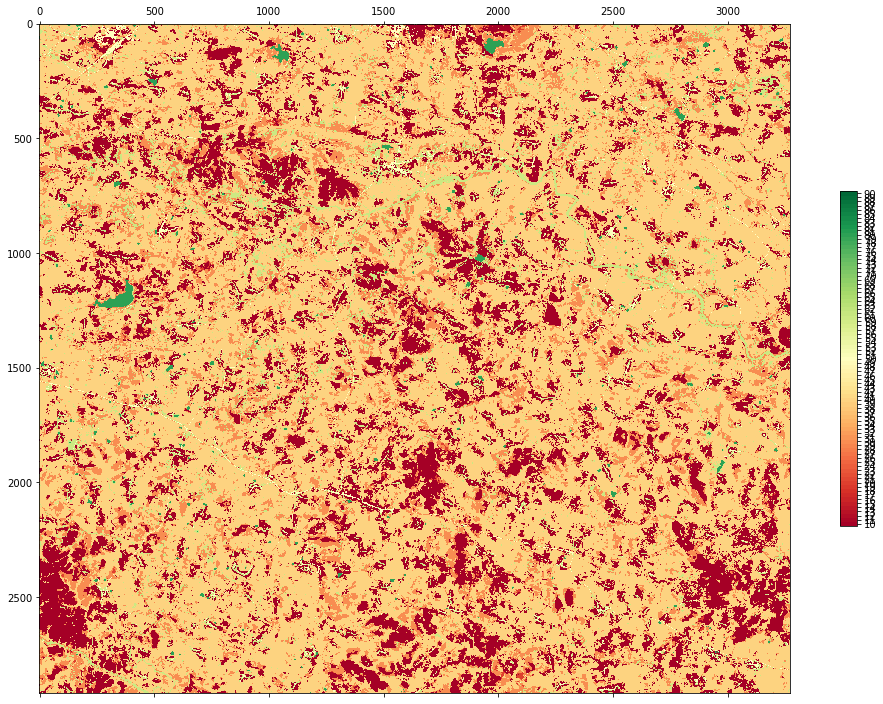

In [ ]:
discrete_matshow2(lulc)

# Convert the lulc into list as the other input layers

In [ ]:
#title Lulc to list
lulc_list=lulc_1.tolist()
#lulc_list

#Create a dictionary of all the available imput and the label data

In [ ]:
#creating a dictionary 
df={"green":green_list,"red":red_list,"nir":nir_list,"ndvi":ndvi_list,"savi":savi_list,"lulc":lulc_list}

#Create a dataframe from the dictionary created

In [ ]:
#creating dataframe
df=pd.DataFrame(df)

Check the dataframe using the .head command

In [ ]:
df.head()

,green,red,nir,ndvi,savi,lulc
0,0.1296,0.1356,0.1866,0.158287,0.093043,60.0
1,0.1217,0.1184,0.1805,0.207762,0.116598,60.0
2,0.1312,0.1313,0.1837,0.166349,0.096442,40.0
3,0.1312,0.1313,0.1837,0.166349,0.096442,40.0
4,0.1411,0.1514,0.1851,0.100149,0.060430,60.0


# Check the unique classes available in the lulc 
can it be done earlier?


In [ ]:
#getting the classes 
df.lulc.unique()

array([60., 40., 10., 50., 30., 80., 20., 90.])

#Import libraries necessary for machine learning 

In [ ]:
# ML libraries
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score

# Creating the independent and dependent variables 

In [ ]:
#Creating the independent and dependent variables 
x=df.drop('lulc',axis=1)
y=df['lulc']

Check the columns in the dataframe

In [ ]:
x.columns

Index(['green', 'red', 'nir', 'ndvi', 'savi'], dtype='object')

#splitting the data into train and test sets in 70-30 ratio

In [ ]:
# Spliting the train and test set in 70/30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=123)

Check the shape of the training data.

In [ ]:
x_train.shape

(6687968, 5)

# Start the machine learning process.
Defination of the hyperparameters are provided initially. These parameters are to be tuned for getting a better model fit for the data. 

Hyperparameters for the RAndom Forest Classifiers

n_estimators=100, *,       criterion='mse', 
max_depth=None,            min_samples_split=2, min_samples_leaf=1,        min_weight_fraction_leaf=0.0, max_features='auto',       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,            oob_score=False, 
n_jobs=None,               random_state=None, 
verbose=0,                 warm_start=False, 
ccp_alpha=0.0,             max_samples=None

# Defining the hyperparameters for the Random Forest Classifier 

In [ ]:
#Using Random Forest classifier
#Define the hyperparameter of Rf
clf = RandomForestClassifier(n_estimators = 20,
                             max_depth=5, 
                             min_samples_split=2)

# Training and testing of the Random Forest Classifier.
In this step the above classifier is made to fit the training data at hand. The model will be unique for this purpose. 

In [ ]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
# metrics are used to find accuracy or error
from sklearn import metrics  

#The y values are predicted using the specific model designed for the study.

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [ ]:
#clf.score(x_train,y_train)

In [ ]:
#clf.score(x_test,y_test)

#Accuracy of the model is calculated.

In [ ]:
#Calculating the Accuracy
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7263979133871454


In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_test.shape

(2866272,)

In [ ]:
set(y_test)

{10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 80.0, 90.0}

In [ ]:
y_test.shape

(2866272,)

# Print the Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 377171       0     533  159530       0      55       6       0]
 [   2335       0       0    7776       0       0       0       0]
 [  11724       0    6762  331729       0    4511    1580       0]
 [  91659       0    2371 1676145       0    6173     274       0]
 [    917       0      17   24729       0    1902       0       0]
 [   2029       0    2929  123940       0   15468     499       0]
 [     92       0    2095    3026       0    1685    6508       0]
 [     14       0      25      63       0       0       0       0]]


# Visualisation of the Confusion Matrix

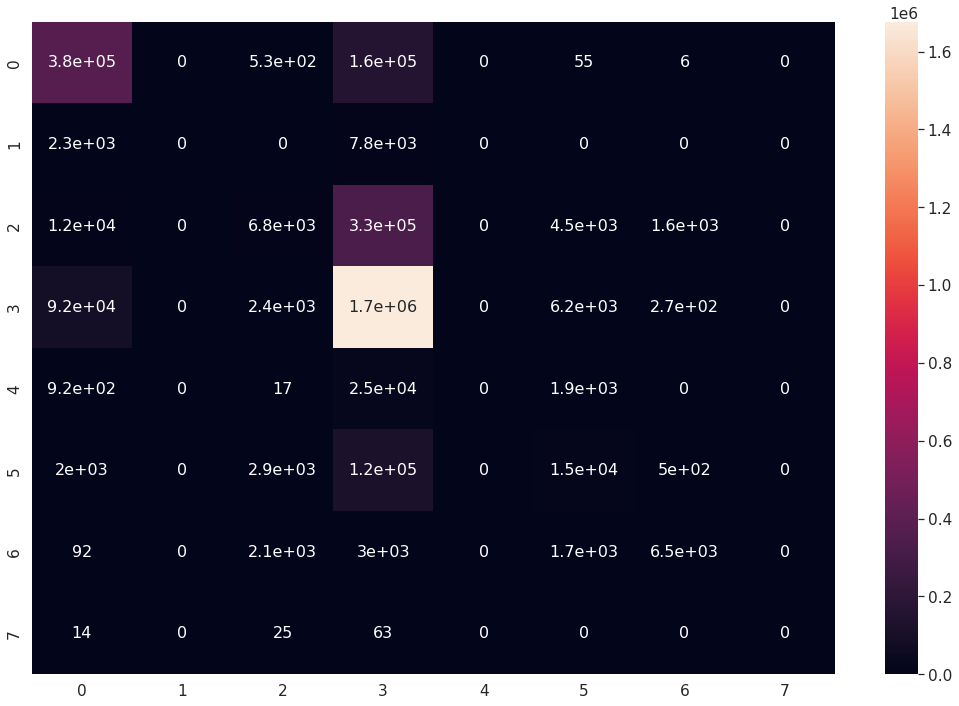

In [ ]:
# title Visualization
array=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, range(8), range(8))
plt.figure(figsize=(18,12))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#plt.show()

In [ ]:
feature_list=list(x.columns)

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = clf.estimators_[1]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 


In [ ]:
print(tree)

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1563237987)


In [ ]:
y = clf.predict(x)
print(y)

[40. 40. 40. ... 40. 40. 40.]


In [ ]:
#title Reshape
a=np.reshape(y,(2920, 3272))
print(a.shape)
a.dtype
a=a.astype(np.int16)

(2920, 3272)


In [ ]:
#title Write
import affine

 # Metadata can be copied from existing file if needed
with rasterio.open('/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_testdata1.tif', 'w',
                   driver='GTiff',
                   dtype=a.dtype,
                    nodata= 0.0,
                    height= 2920,
                    width=3272,
                    count= 1,
                    crs= rasterio.crs.CRS({'init': 'epsg:32645'}),
                    transform=affine.Affine(10.0, 0.0, 582160.0,0.0, -10.0, 2575510.0)) as file:
    file.write(a,1)


In [ ]:
#Predicted image
lulc_pred1=rasterio.open("/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_testdata1.tif")
lulc_pred1=lulc_pred1.read(1)

In [ ]:
#title Default title text
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc_pred1)

In [ ]:
#title Visualization
def discrete_matshow2(data):
    #get discrete colormap
    cmap = plt.get_cmap('RdBu', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(15,12)) ## increase fig size
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, fignum=1) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5) ## added shrink

1. Water

2. Trees

3. Grass

4. Flooded vegetation

5. Crops

6. Scrub/shrub

7. Built Area

8. Bare ground

In [ ]:
discrete_matshow2(lulc_pred1)

#Test data

In [ ]:
mss_test=rasterio.open('/content/drive/MyDrive/GEE/Bankura_2020.tif')

In [ ]:
mss_test.meta

{'count': 5,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 2882,
 'nodata': None,
 'transform': Affine(8.983152841195215e-05, 0.0, 86.98315030906598,
       0.0, -8.983152841195215e-05, 23.335356472515986),
 'width': 3257}

In [ ]:
# Getting the meta data from the image
georef_t = mss_test.meta
print(georef_t)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3257, 'height': 2882, 'count': 5, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 86.98315030906598,
       0.0, -8.983152841195215e-05, 23.335356472515986)}


In [ ]:
#blue_test=mss_test.read(1)
green_test = mss_test.read(3)
red_test = mss_test.read(4)
nir_test = mss_test.read(5)

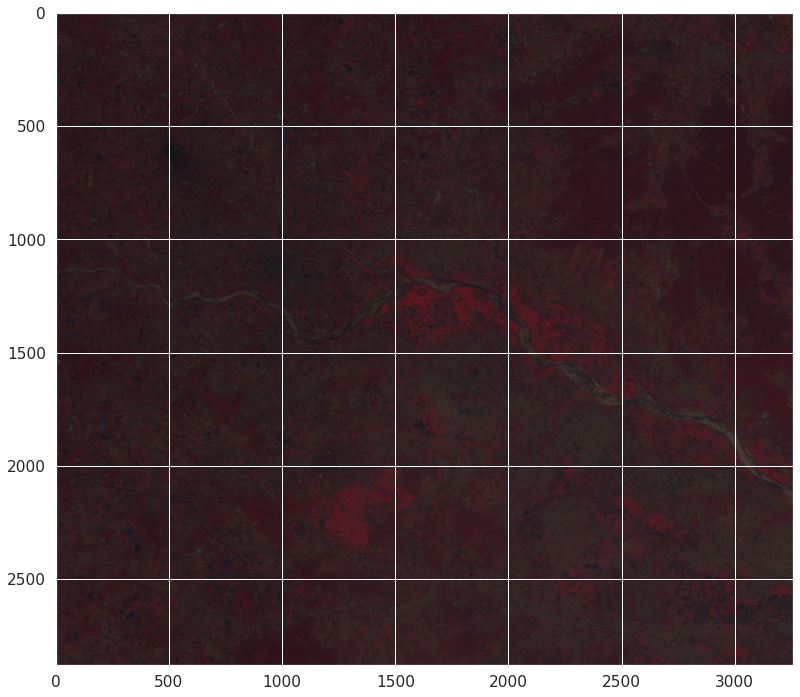

In [ ]:
nrg = np.dstack((nir_test, red_test, green_test))

# Let's see how our color composite looks like
fig = plt.figure(figsize=(18,12))
plt.imshow(nrg)

In [ ]:
print(green_test.shape)
print(red_test.shape)
print(nir_test.shape)

(2882, 3257)
(2882, 3257)
(2882, 3257)


In [ ]:
ndvi_test=np.where((nir_test+red_test)==0.0, 0,(nir_test-red_test)/(nir_test+red_test))
ndvi_test.shape

(2882, 3257)

In [ ]:
savi_test=np.where((nir_test+red_test+0.5)==0.0, 0, (nir_test-red_test)/(nir_test+red_test+0.5))*1.5
savi_test.shape

(2882, 3257)

In [ ]:
# title Default title text
green_test_flt=green_test.flatten()
red_test_flt=red_test.flatten()
#rededge1=rededge.flatten()
nir_test_flt=nir_test.flatten()
ndvi_test_flt=ndvi_test.flatten()
savi_test_flt=savi_test.flatten()

In [ ]:
green_test_flt.shape
red_test_flt.shape
nir_test_flt.shape
ndvi_test_flt.shape
savi_test_flt.shape

(9386674,)

In [ ]:
green_list_t=green_test_flt.tolist()
red_list_t=red_test_flt.tolist()
#rededge_list=rededge1.tolist()
nir_list_t=nir_test_flt.tolist()
#swir_list=swir11.tolist()
ndvi_list_t=ndvi_test_flt.tolist()
#ndmi_list=ndmi1.tolist()
savi_list_t=savi_test_flt.tolist()

In [ ]:
print(len(green_list_t))
print(len(red_list_t))
print(len(nir_list_t))
print(len (ndvi_list_t))
print(len(savi_list_t))

9386674
9386674
9386674
9386674
9386674


In [ ]:
df_t={"green":green_list_t,"red":red_list_t,"nir":nir_list_t,"ndvi":ndvi_list_t,"savi":savi_list_t}
#df={"green":green_list,"red":red_list,"nir":nir_list,"ndvi":ndvi_list,"savi":savi_list,"lulc":lulc_list}

In [ ]:
dft=pd.DataFrame(df_t)
#df=pd.DataFrame(df)

In [ ]:
x_t=dft

In [ ]:
y_pr = clf.predict(x_t)

In [ ]:
lulc_pred=rasterio.open("/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_new.tif")
lulc_pred=lulc_pred.read(1)

In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc_pred)

1. Water


2. Trees


3. Grass


4. Flooded vegetation


5. Crops

6. Scrub/shrub

7. Built Area


8. Bare ground


9. Snow/Ice

 
10. Clouds



In [ ]:
discrete_matshow2(lulc_pred)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20)) 

# Show the color image
axs[0].imshow(nrg)
axs[0].set_title('Color Image')

# Show NDVI
axs[1].imshow(lulc_pred, cmap='RdBu')
axs[1].set_title('Predicted_lulc')

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 